# Graphing exercises


 


## Let's revisit the "Simple Program"

First, there are several elements of my code that we can improve, so this will let me reiterate some of the golden rules.

Second, below I'll **create variables based only on group data**. Here, it's computing returns for a firm (i.e. the "group" is all observations for a single firm), but this is broadly applicable (you can change the group to "firm-year" or "industry" or "industry-year" or "industry-year-state" or...

Third, we get to practice plotting, and then improving bad plots. 

In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr # you might need to install this (see above)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# don't copy and paste these lists and number in several places 
# (which is what the original "simple program" did... that's bad programming!)
# instead, create a var - if we change it here, it changes everywhere
stocks = ['AAPL','MSFT','VZ']
start_yr = 2000

# load
stock_prices = pdr.get_data_yahoo(stocks, start=start_yr)
stock_prices = stock_prices.filter(like='Adj Close') # reduce to just columns with this in the name
stock_prices.columns = stocks # put their tickers as column names
stock_prices # print

,AAPL,MSFT,VZ
Date,,,
2000-01-03,3.470226,37.495686,20.721500
2000-01-04,3.177650,36.229057,20.051672
2000-01-05,3.224152,36.611080,20.721500
2000-01-06,2.945139,35.384666,20.631170
2000-01-07,3.084645,35.847076,20.478834
...,...,...,...
2020-02-03,307.929199,174.380005,58.049999
2020-02-04,318.095062,180.119995,58.290001
2020-02-05,320.688934,179.899994,59.130001


In [2]:
# this is wide data... so if we want to create a new variable, we have to do it once for each firm...
# what if we have 1000 firms? seems tough to do...
# make long/tidy:
stock_prices = stock_prices.stack().swaplevel().sort_index().reset_index()
stock_prices.columns = ['Firm','Date','Adj Close']
stock_prices # print - now that is formatted nicely, like CRSP! 

# note: we might have to tweak the regression section of "Simple Program"
# to work with the long data, but I suspect that it would be shorter code and 
# more "generally applicable" (ie easily work with N=1000+ firms)

,Firm,Date,Adj Close
0,AAPL,2000-01-03,3.470226
1,AAPL,2000-01-04,3.177650
2,AAPL,2000-01-05,3.224152
3,AAPL,2000-01-06,2.945139
4,AAPL,2000-01-07,3.084645
...,...,...,...
15166,VZ,2020-02-03,58.049999
15167,VZ,2020-02-04,58.290001
15168,VZ,2020-02-05,59.130001
15169,VZ,2020-02-06,59.439999


In [3]:
# add return var.
# MAKE SURE YOU CREATE THE VARIABLES WITHIN EACH FIRM - use groupby
stock_prices['ret'] = stock_prices.groupby('Firm')['Adj Close'].pct_change()
stock_prices # print - the first ret for each firm should be missing...

,Firm,Date,Adj Close,ret
0,AAPL,2000-01-03,3.470226,NaN
1,AAPL,2000-01-04,3.177650,-0.084310
2,AAPL,2000-01-05,3.224152,0.014634
3,AAPL,2000-01-06,2.945139,-0.086538
4,AAPL,2000-01-07,3.084645,0.047368
...,...,...,...,...
15166,VZ,2020-02-03,58.049999,-0.023385
15167,VZ,2020-02-04,58.290001,0.004134
15168,VZ,2020-02-05,59.130001,0.014411
15169,VZ,2020-02-06,59.439999,0.005243


### Questions:
1. Check that there are 3 missing observations of `ret`: the first return for each shouldn't exist.
1. Describe returns for each firm separately (i.e. make one table), and your answers should match mine below.
2. Replicate and then improve each of the three figures below.
    - Are there any issues with this data as is? How would you fix it?
 

Firm          AAPL         MSFT           VZ
count  5056.000000  5056.000000  5056.000000
mean      0.001232     0.000494     0.000328
std       0.025359     0.018968     0.015351
min      -0.518692    -0.155977    -0.118461
25%      -0.010334    -0.008045    -0.007229
50%       0.000899     0.000337     0.000395
75%       0.012946     0.008933     0.007706
max       0.139049     0.195652     0.146324


C:\Users\DoLe\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'WHAT AN AWFULLY BAD FIGURE')

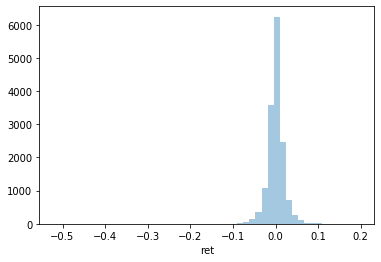

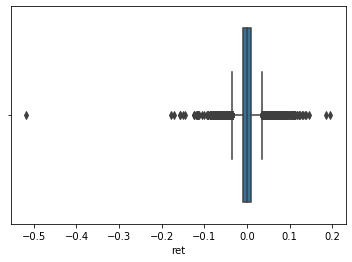

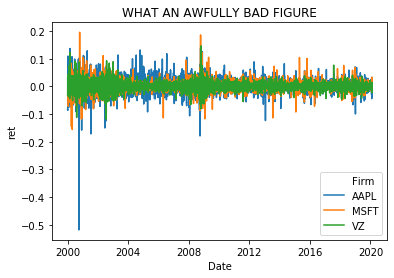

In [4]:
# Q2: describe returns by firm...
print(stock_prices.groupby('Firm')['ret'].describe().transpose())

# Q3: explot returns with a histogram
sns.distplot(stock_prices['ret'].dropna(),kde=False) # distplot cant handle NaNs... 
            #notice the axis is messed up and wide.... there is that very low return

# Q4
plt.figure()
sns.boxplot(stock_prices['ret']) # WHOA!

# Q5
plt.figure()
sns.lineplot(data=stock_prices,x='Date',y='ret',hue='Firm')
plt.title("WHAT AN AWFULLY BAD FIGURE")

## Pushing ASGN-02 further

Let's make a new figure and explore some new variables, which are described at https://github.com/LeDataSciFi/lectures-spr2020/tree/master/assignment_data

Copy this cell into your live coding notebook and run it to get a firm-year (1 obs per firm per year) dataset:


In [5]:
stocks = pd.read_stata('https://github.com/LeDataSciFi/lectures-spr2020/blob/master/assignment_data/stocks_2006.dta?raw=true')
stocks.name = "Stocks"

# convert to annual return and std deviation 
annual = pd.DataFrame() # open an empty dataframe
annual['ret'] = (stocks.assign(ret=stocks['ret']+1) # now we have R(t) for each observation
                       .groupby('permno')['ret']    # for each firm,
                       .prod()                      # multiple all the gross returns
                       -1                           # and subtract one to get back to the total period return
)
annual['std'] = stocks.groupby('permno')['ret'].std().mul(np.sqrt(250)) #times sqrt(250) to annualize
annual['year'] = stocks.groupby('permno')['date'].first().dt.year

# get firm information 
# this firm file is like prior, but includes more variables
# investing, financing, industry competition and more!
# VARIABLE DESCRIPTIONS IN README AT: https://github.com/LeDataSciFi/lectures-spr2020/tree/master/assignment_data
firms = pd.read_stata('https://github.com/LeDataSciFi/lectures-spr2020/blob/master/assignment_data/firms_2006_fuller.dta?raw=true')
firms.name = "Firms"

# merge firm data with annualized stock data
firms = firms.merge(left_on=['lpermno','fyear'], 
            right=annual, right_on=['permno','year'],
            how='inner') 

# and this is a subsample of a few industries and states
subsample = firms.query('state in ["CA","NY"] & gsector in ["40","45"]') 


### Exercise: Plot returns by industry 

Scatterplot GSector and Returns, and use the full sample (`firms`).

Question 1: What is your reaction to this?

Question 2: Choose a different graph type to improve it **visually**.


### Exercise: Plot returns vs. risk

Scatterplot Std and Returns, and use the subsample sample (`subsample`).

Question: How can this be improved?


### Exercise: Plot average returns in the industry

Use the full sample and plot the means as a bar chart. 

Question: How can this be improved?
